<a href="https://colab.research.google.com/github/NguyenSLam/Report_for_homework_Artificial-Intelligence-/blob/main/futurebased_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
folder = '/content/drive/MyDrive/AI_Picture/futurebased_Data/Train/'
photos, labels = list(), list()
for file in os.listdir(folder):
    output = 0.0
    if file.startswith('mat_chu_nhat'):
        output = 1.0
    if file.startswith('mat_trai_xoan'):
        output = 2.0
    if file.startswith('mat_vuong'):
        output = 3.0
    if file.startswith('mat_tron'):
        output = 4.0
    if output != 0.0:                    
        photo = load_img(folder + file, target_size=(50, 50, 3))
        photo = img_to_array(photo)
        photos.append(photo)
        labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/futurebased_Data_photos', photos)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/futurebased_Data_labels', labels)

(27, 50, 50, 3) (27,)


In [ ]:
#chia 10% dữ liệu cho tập kiểm tra và 90% còn lại cho tập huấn luyện.
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]
print(train_x.shape, test_x.shape)

(25, 50, 50, 3) (2, 50, 50, 3)


In [ ]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((25, 50, 50, 3))
train_x = train_x.astype('float32')/255
test_x = test_x.reshape((2, 50, 50, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,5)
test_y = to_categorical(test_y,5)

In [ ]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(25, 50, 50, 3)
(2, 50, 50, 3)
(25, 5)
(2, 5)


In [ ]:
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam,SGD  
from keras import losses
loss = losses
batch_size = 32
epochs = 20
classes = 5

In [ ]:
# khởi tạo một mô hình mạng neural convolutional (CNN) 
from keras.layers import LeakyReLU
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(50,50,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 25, 25, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

In [ ]:
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,verbose=1)
#Đoạn code này đánh giá độ chính xác của mô hình
test_loss, test_acc = model.evaluate(train_x, train_y)
print('Mất mát:',test_loss)
print('Độ chính xác',test_acc)

Epoch 1/20
1/1 [==============================] - 8s 8s/step - loss: 1.5948 - accuracy: 0.2800
Epoch 2/20
1/1 [==============================] - 0s 18ms/step - loss: 1.4943 - accuracy: 0.2800
Epoch 3/20
1/1 [==============================] - 0s 21ms/step - loss: 1.5377 - accuracy: 0.2800
Epoch 4/20
1/1 [==============================] - 0s 13ms/step - loss: 1.4230 - accuracy: 0.2400
Epoch 5/20
1/1 [==============================] - 0s 21ms/step - loss: 1.3520 - accuracy: 0.3600
Epoch 6/20
1/1 [==============================] - 0s 14ms/step - loss: 1.3565 - accuracy: 0.2800
Epoch 7/20
1/1 [==============================] - 0s 14ms/step - loss: 1.3311 - accuracy: 0.2800
Epoch 8/20
1/1 [==============================] - 0s 12ms/step - loss: 1.3012 - accuracy: 0.3200
Epoch 9/20
1/1 [==============================] - 0s 12ms/step - loss: 1.2798 - accuracy: 0.6400
Epoch 10/20
1/1 [==============================] - 0s 12ms/step - loss: 1.2470 - accuracy: 0.6800
Epoch 11/20
1/1 [==============

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/futurebased.h5')

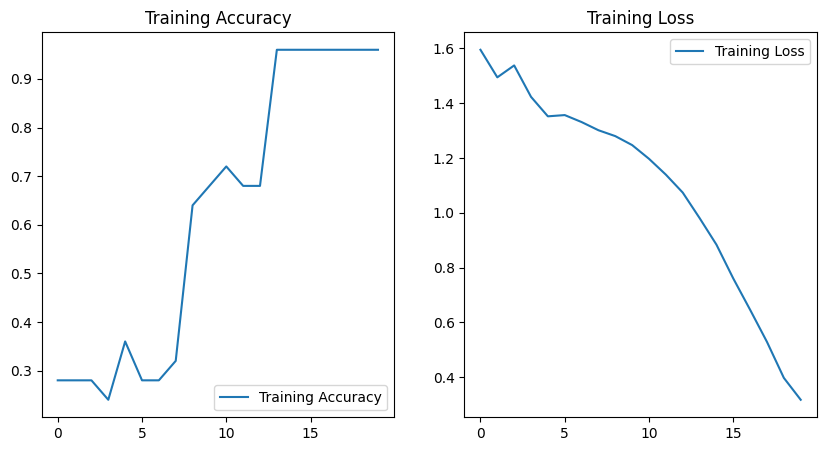

In [ ]:
# Vẽ biểu đồ độ chính xác và độ mất mát của mô hình trong quá trình huấn luyện
acc = train.history['accuracy']
loss = train.history['loss']
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

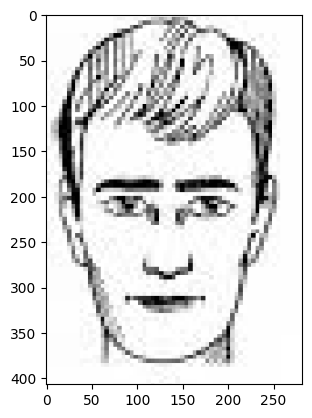

1/1 [==============================] - 0s 73ms/step
Khuôn mặt này là mat_chu_nhat . Miêu tả: Đây là khuôn mặt có đội dài lớn nhất, chiều rộng của trán, xương gò má và hai bên hàm dưới tương đối bằng nhau.Nếu khuôn mặt hình chữ nhật kết hợp với ngũ quan tốt thì là tướng đại phú đại quý. Nếu kết hợp với nét tướng tai dày, miệng rộng, cằm lồi và hướng lên trên thì cả đời phú quý.Khuôn mặt chữ nhật mà lông mày thưa thì sẽ phá tướng, gây cản trở sự nghiệp. Nếu cằm ngắn thì dương thọ ngắn. Mặt to mũi nhỏ thì vận số xấu, cuộc đời vất vả, tình duyên lận đận.Nhìn chung, nam giới có khuôn mặt hình chữ nhật sẽ có cuộc sống hạnh phúc, liên tục gặp vận tốt về tiền bạc và gia đình. Còn nữ giới thì suốt đời được hưởng hạnh phúc.


In [ ]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model=load_model("/content/drive/MyDrive/Colab Notebooks/Data/futurebased.h5")

class_name = ["","mat_chu_nhat","mat_trai_xoan","mat_vuong","mat_tron"]

# Tạo dictionary lưu trữ miêu tả các kiểu khuôn mặt
descriptions = {
    1: "Đây là khuôn mặt có đội dài lớn nhất, chiều rộng của trán, xương gò má và hai bên hàm dưới tương đối bằng nhau.Nếu khuôn mặt hình chữ nhật kết hợp với ngũ quan tốt thì là tướng đại phú đại quý. Nếu kết hợp với nét tướng tai dày, miệng rộng, cằm lồi và hướng lên trên thì cả đời phú quý.Khuôn mặt chữ nhật mà lông mày thưa thì sẽ phá tướng, gây cản trở sự nghiệp. Nếu cằm ngắn thì dương thọ ngắn. Mặt to mũi nhỏ thì vận số xấu, cuộc đời vất vả, tình duyên lận đận.Nhìn chung, nam giới có khuôn mặt hình chữ nhật sẽ có cuộc sống hạnh phúc, liên tục gặp vận tốt về tiền bạc và gia đình. Còn nữ giới thì suốt đời được hưởng hạnh phúc.",
    2: "Đây là khuôn mặt có xương hàm thon gọn, cằm không quá dài, xương hàm và cằm tạo nên hình dáng tương tự như hình elip. Đây là gương mặt đẹp nhất trong các gương mặt.Người sở hữu tướng mặt này thường có hậu vận tốt, đường công danh xán lạn, gặp may mắn và thuận lợi trong cuộc sống.Bên cạnh đó, họ cũng dễ gây được thiện cảm với người đối diện dù gặp lần đầu. Vì có đường công danh rộng mở nên cơ hội thăng tiến cao. Họ thích hợp với vị trí lãnh đạo, cấp trên.",
    3: "Người này có khuôn mặt khá vuông vức, vầng trán cao và rộng, đường nét trên khuôn mặt đối xứng với nhau qua đỉnh mũi, nhân trung và đỉnh cằm.Người có tướng mặt hình vuông thường quyết đoán, làm chủ vận thế. Nếu là đàn ông thì có số quý tướng, thường làm quan và có sự nghiệp rộng mở. Ở họ toát lên vẻ mạnh mẽ, khí chất, là chỗ dựa vững chắc cho gia đình.Cuộc đời của họ gặp nhiều may mắn nếu khuôn mặt chữ điền hài hòa với các yếu tố Thượng đình, Trung đình, Hạ đình. Còn nếu xung khắc thì cuộc sống gặp nhiều vất vả, thăng trầm.",
    4: "Người có khuôn mặt tròn có đặc điểm chiều cao và chiều rộng của khuôn mặt gần bằng nhau. Xương gò má không nhìn thấy rõ và gò má không góc cạnh. Khuôn mặt của họ khá tròn trịa, có phần trẻ con.Tuy vậy, tính cách của họ lại vô cùng người lớn. Họ sống giàu tình thương, nhạy cảm nên dễ bị mê hoặc bởi người khác phái. Đôi lúc họ cũng hơi bốc đồng và bất nhất giữa lời nói và hành động.Những người này có số giàu sang phú quý nhưng hay phải đi xa lập nghiệp. Nếu không giữ được lập trường thì dễ sa vào con đường xấu, ảnh hưởng đến tương lai."
}

img1=load_img('/content/drive/MyDrive/AI_Picture/futurebased_Data/Test/mat_chu_nhat(6).png')
plt.imshow(img1)
plt.show()
img1=load_img('/content/drive/MyDrive/AI_Picture/futurebased_Data/Test/mat_chu_nhat(6).png',target_size=(50,50))
img1=img_to_array(img1)
img1=img1.reshape(1,50,50,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
face_type = np.argmax(predict[0])
face_description = descriptions[face_type]
print("Khuôn mặt này là", class_name[face_type], ". Miêu tả:", face_description)

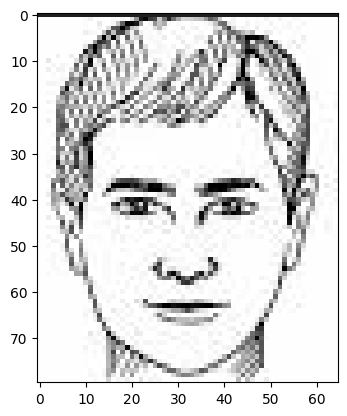

1/1 [==============================] - 0s 24ms/step
Khuôn mặt này là mat_tron . Miêu tả: Người có khuôn mặt tròn có đặc điểm chiều cao và chiều rộng của khuôn mặt gần bằng nhau. Xương gò má không nhìn thấy rõ và gò má không góc cạnh. Khuôn mặt của họ khá tròn trịa, có phần trẻ con.Tuy vậy, tính cách của họ lại vô cùng người lớn. Họ sống giàu tình thương, nhạy cảm nên dễ bị mê hoặc bởi người khác phái. Đôi lúc họ cũng hơi bốc đồng và bất nhất giữa lời nói và hành động.Những người này có số giàu sang phú quý nhưng hay phải đi xa lập nghiệp. Nếu không giữ được lập trường thì dễ sa vào con đường xấu, ảnh hưởng đến tương lai.


In [ ]:
img2=load_img('/content/drive/MyDrive/AI_Picture/futurebased_Data/Test/mat_tron(4).png')
plt.imshow(img2)
plt.show()
img2=load_img('/content/drive/MyDrive/AI_Picture/futurebased_Data/Test/mat_tron(4).png',target_size=(50,50))
img2=img_to_array(img2)
img2=img2.reshape(1,50,50,3)
img2=img2.astype('float32')
img2=img2/255
predict=model.predict(img2)
face_type = np.argmax(predict[0])
face_description = descriptions[face_type]
print("Khuôn mặt này là", class_name[face_type], ". Miêu tả:", face_description)